In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
import xgboost

In [10]:
data = pd.read_csv(r"C:\Users\Ramesh\Downloads\traffic volume.csv")

In [12]:
data['holiday'] = data['holiday'].fillna('None')

In [14]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [16]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [20]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [22]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)


C:\Users\Ramesh\AppData\Local\Temp\ipykernel_19644\3928165545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
C:\Users\Ramesh\AppData\Local\Temp\ipykernel_19644\3928165545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [24]:
from collections import Counter

In [26]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [28]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_19644\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000066  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  


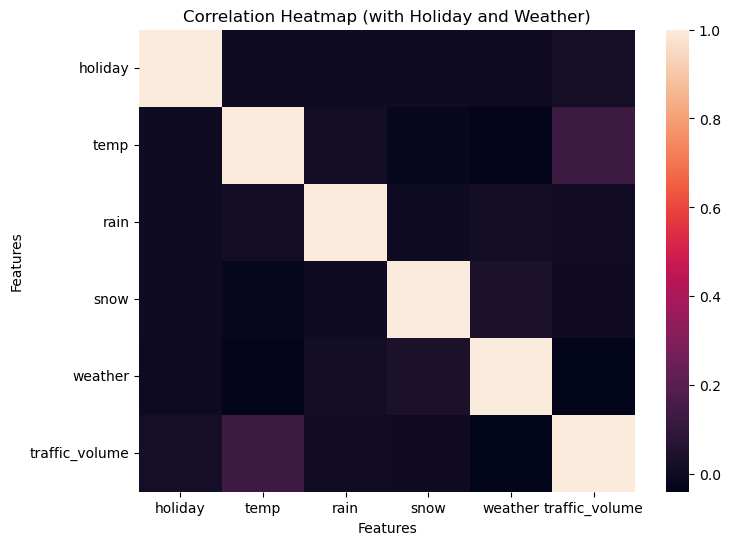

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'holiday' and 'weather' to numeric (if they are not already)
# Assuming 'holiday' is categorical (like 'None', 'Holiday') and 'weather' has categories
data['holiday'] = data['holiday'].astype('category').cat.codes
data['weather'] = data['weather'].astype('category').cat.codes

# Now select only numeric columns (including converted ones)
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation
cor = numeric_data.corr()

# Display the correlation matrix
print(cor)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor)

# Add plot labels and title
plt.title("Correlation Heatmap (with Holiday and Weather)")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()


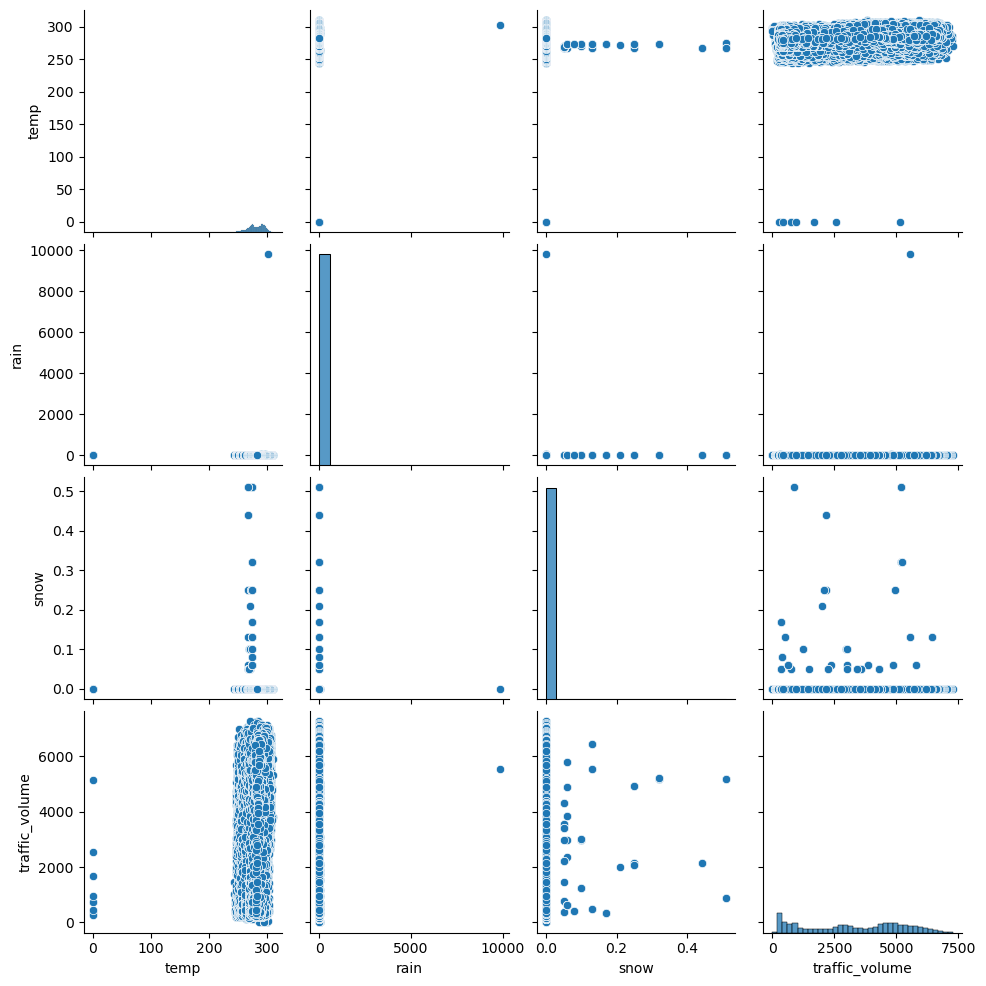

In [32]:
sns.pairplot(data[['temp', 'rain', 'snow', 'traffic_volume']], height=2.5)


<Axes: >

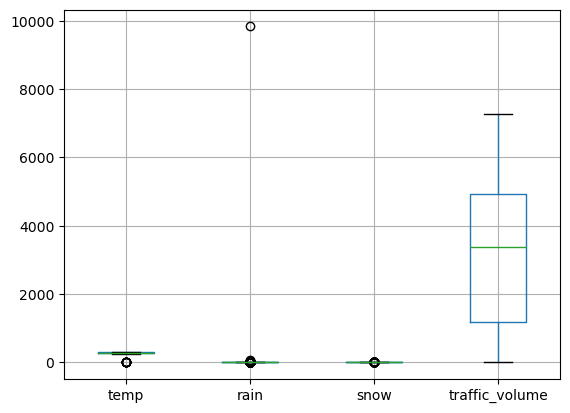

In [33]:
data[['temp', 'rain', 'snow', 'traffic_volume']].boxplot()


In [36]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)

In [38]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [40]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [42]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [44]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [46]:
names = x.columns

In [48]:
from sklearn.preprocessing import scale

In [50]:
x = scale(x)

In [52]:
x = pd.DataFrame(x,columns=names)

In [54]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [56]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [62]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [65]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [69]:
from sklearn import metrics

In [70]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636863
1.0
0.9746668126431605
-12.18810423138228
0.8472604751586914


In [72]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [73]:
print(metrics.r2_score(p1, y_test))
print(metrics.r2_score(p2, y_test))
print(metrics.r2_score(p3, y_test))
print(metrics.r2_score(p4, y_test))
print(metrics.r2_score(p5, y_test))


-5.39939639832218
0.6942091188825187
0.8023753802603772
-11.972215715232423
0.8065614104270935


In [74]:
MSE = metrics.mean_squared_error(p3,y_test)

In [75]:
np.sqrt(MSE)

799.3840125192603

In [96]:

from sklearn.ensemble import RandomForestRegressor

In [98]:
model = RandomForestRegressor()

In [104]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [108]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 644050.9132287626


In [110]:


import joblib
joblib.dump(model, 'traffic_model.pkl')
     


['traffic_model.pkl']

In [112]:


import os
print(os.listdir())

     


['.anaconda', '.conda', '.condarc', '.continuum', '.eclipse', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.p2', '.spyder-py3', '.vscode', '22AK1A3367', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'encoder.pkl', 'Favorites', 'index.html', 'Jedi', 'Links', 'Local Settings', 'model.pkl', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{f62bdcf1-1ca8-11ee-a953-cc47403afd47}.TM.blf', 'NTUSER.DAT{f62bdcf1-1ca8-11ee-a953-cc47403afd47}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{f62bdcf1-1ca8-11ee-a953-cc47403afd47}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'scale.pkl', 'Searches', 'SendTo', 'Start Menu', 'template', 'Templates', 'traffic_model.pkl', 'Untitled.ipynb', 'Untitled3.ipynb', 'Videos']


In [5]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scale.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Show download links
from IPython.display import FileLink, display
display(FileLink("model.pkl"))
display(FileLink("scale.pkl"))


C:\Users\Ramesh\model.pkl

C:\Users\Ramesh\scale.pkl

In [7]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Create dummy data with 11 features
np.random.seed(42)
data = pd.DataFrame({
    'holiday': np.random.randint(0, 2, 1000),
    'temp': np.random.uniform(0, 40, 1000),
    'rain': np.random.uniform(0, 20, 1000),
    'snow': np.random.uniform(0, 10, 1000),
    'weather': np.random.randint(1, 5, 1000),
    'year': np.random.choice([2023, 2024], 1000),
    'month': np.random.randint(1, 13, 1000),
    'day': np.random.randint(1, 29, 1000),
    'hours': np.random.randint(0, 24, 1000),
    'minutes': np.random.randint(0, 60, 1000),
    'seconds': np.random.randint(0, 60, 1000)
})

data['traffic_volume'] = (
    100 + data['temp'] * 10 
    - data['rain'] * 5 
    - data['snow'] * 3 
    + data['hours'] * 8 
    + np.random.normal(0, 10, 1000)
).astype(int)

X = data.drop('traffic_volume', axis=1)
y = data['traffic_volume']

# Train scaler and model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor()
model.fit(X_scaled, y)
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scale.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Show download links
from IPython.display import FileLink, display
display(FileLink("model.pkl"))
display(FileLink("scale.pkl"))



C:\Users\Ramesh\model.pkl

C:\Users\Ramesh\scale.pkl